## Imports

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm as _pltcolormap
from matplotlib import colors as _pltcolors
import numpy as np
import pandas as pd
import sys
import pathlib
import os

## Background and Raw Data

In [6]:
bg_name = "D:\\Code\\LDiCS\\G06_Hospital\\40_Realisation\\00_Recorded_Sensor_Data\\2022-07-05_17-59-26__AC-off__BLINDS-up__NOP-0\\EYE_old.csv"
raw_name = "D:\\Code\\LDiCS\\G06_Hospital\\40_Realisation\\00_Recorded_Sensor_Data\\2022-07-05_19-25-16__AC-off__BLINDS-up__NOP-1__stand-shirt\\EYE_old.csv"
bg_df = pd.read_csv(bg_name)
raw_df = pd.read_csv(raw_name)
bg_list = bg_df.values.tolist()
raw_list = raw_df.values.tolist()

## Background removal

In [13]:
bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()

In [42]:
diff_raw_mean = (raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).iloc[65] - bg_mean).values.reshape(8,8)

In [43]:
T = 0.75
active_pixels = np.where(diff_raw_mean > T, diff_raw_mean, 0)

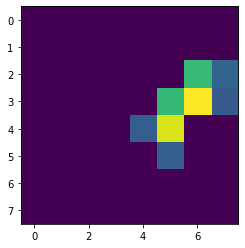

In [45]:
plt.imshow(active_pixels)

In [75]:
raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)

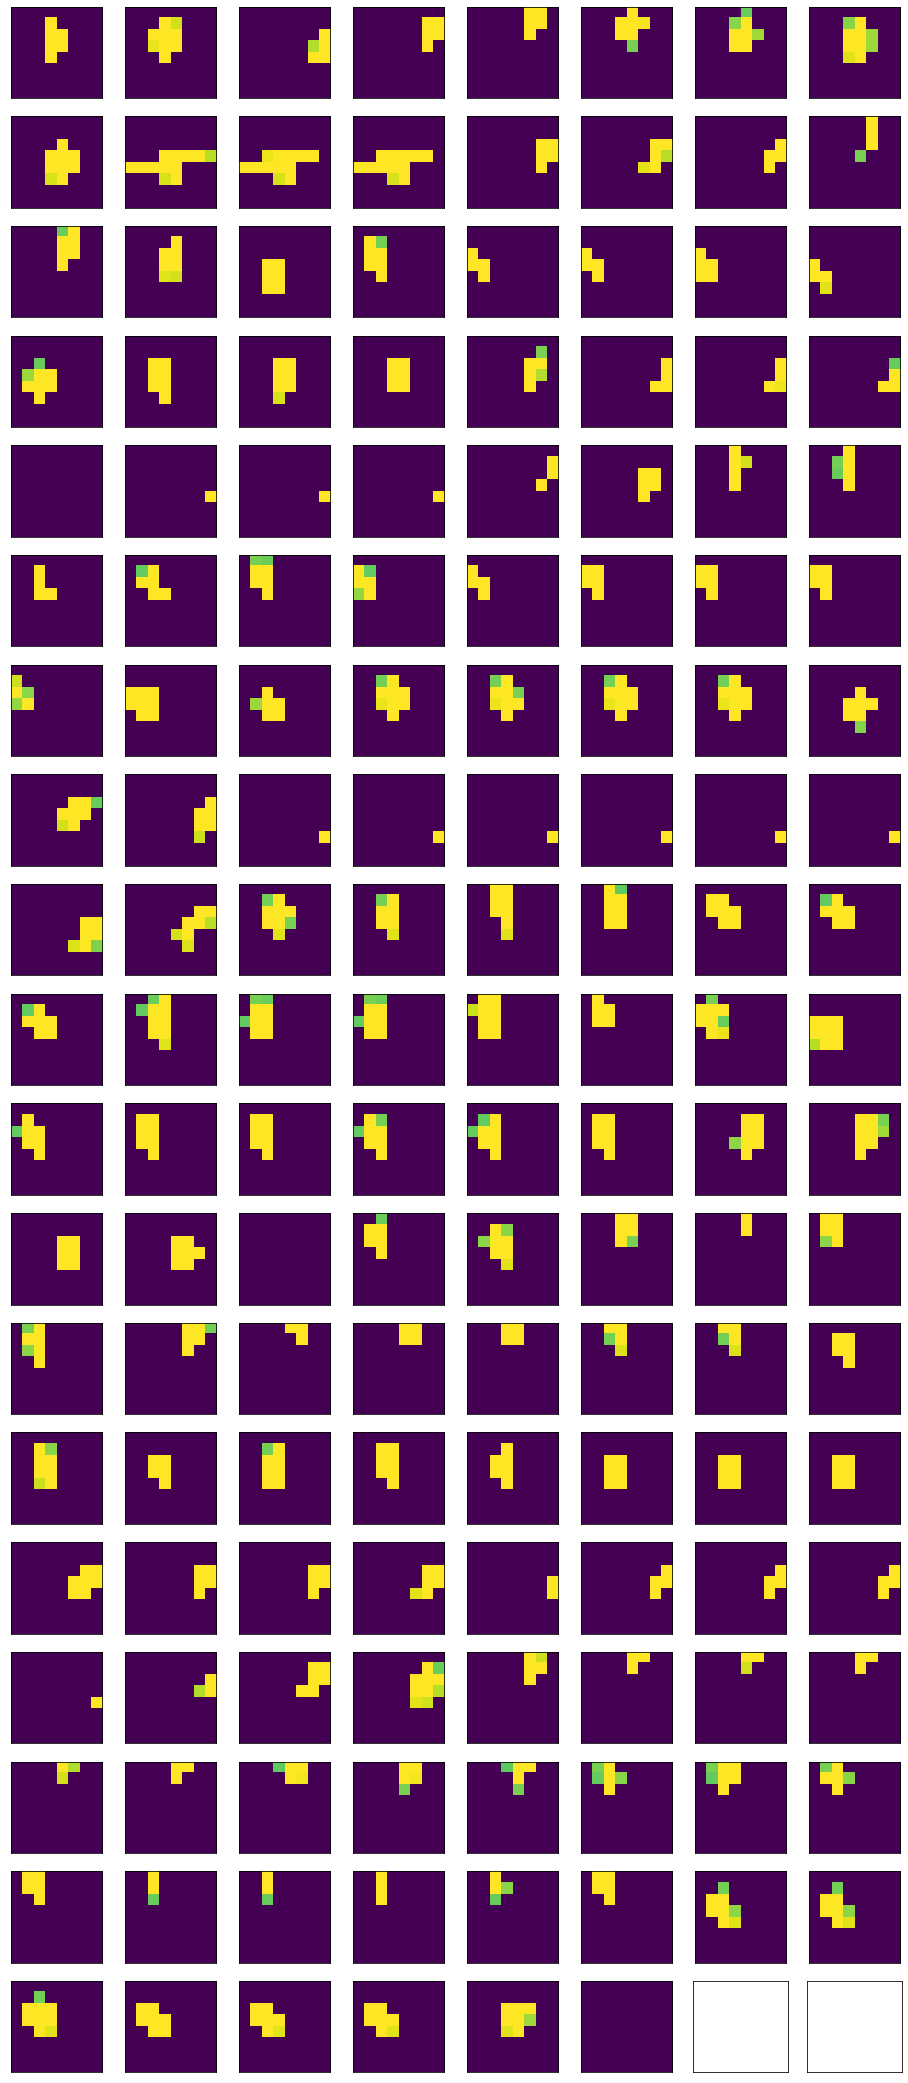

In [77]:
col_num = 8
row_num = raw_df.shape[0] // col_num + (1 if raw_df.shape[0] % col_num != 1 else 0)
T = 0.75

fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
n = raw_df.shape[0]
for i in range(n):
    x = i // col_num
    y = i % col_num
    diff = (raw_df_nolabels.iloc[i] - bg_mean).values.reshape(8,8)
    bg_removed = np.where(diff > T, diff, 0)
    axs[x,y].imshow(bg_removed, vmin = 0, vmax = 1)

In [5]:
def remove_background(raw_df, bg_df, T):
    bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
    raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
    col_num = 8
    row_num = raw_df.shape[0] // col_num + (1 if raw_df.shape[0] % col_num >= 1 else 0)
    
    fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    n = raw_df.shape[0]
    for i in range(n):
        x = i // col_num
        y = i % col_num
        diff = (raw_df_nolabels.iloc[i] - bg_mean).values.reshape(8,8)
        bg_removed = np.where(diff > T, diff, 0)
        axs[x,y].imshow(bg_removed)#, vmin = 0, vmax = 1)

### Working with files and directories

In [99]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            print(path.name)
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        print(21 * " " + path2.name[21:])
                        #path2 is a background with no bed, use accordingly
                    
os.chdir(prev_cwd)

2022-07-05_19-25-16__AC-off__BLINDS-up__NOP-1__stand-shirt
                     AC-off__BLINDS-up__NOP-0
2022-07-05_19-58-50__AC-off__BLINDS-up__NOP-2__stand-shirt__laying-shirt__BED
                     AC-off__BLINDS-up__NOP-0
2022-07-06_13-34-02__AC-off__BLINDS-down__NOP-1__stand-shirt
                     AC-off__BLINDS-down__NOP-0
2022-07-06_14-01-45__AC-off__BLINDS-down__NOP-2__stand-jacket__laying-shirt__BED
                     AC-off__BLINDS-down__NOP-0
2022-07-13_18-06-59__AC-on__BLINDS-up__NOP-1__stand-shirt
                     AC-on__BLINDS-up__NOP-0
2022-07-14_20-47-36__AC-on__BLINDS-up__NOP-2__stand-shirt__laying-jacket__BED
                     AC-on__BLINDS-up__NOP-0
2022-07-14_21-35-09__AC-on__BLINDS-down__NOP-1__stand-jacket
                     AC-on__BLINDS-down__NOP-0
2022-07-15_19-45-38__AC-off__BLINDS-up__NOP-2__stand-jacket__laying-jacket__BED
                     AC-off__BLINDS-up__NOP-0
2022-07-15_20-22-50__AC-off__BLINDS-up__NOP-2__stand-shirt__laying-jacket

In [7]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

In [2]:
def rm_bg(T, ac, blinds, nop, bed = False, person_1 = "---", person_2 = "---"):
    AC = "AC-" + ac
    BLINDS = "BLINDS-" + blinds
    NOP = "NOP-" + str(nop)
    name = AC + "__" + BLINDS + "__" + NOP
    if person_1 != "---":
        name += "__" + person_1
    if person_2 != "---":
        name += "__" + person_2
    if bed:
        name += "__BED"
    prev_cwd = pathlib.Path.cwd()
    os.chdir(rootdir)
    
    for path in pathlib.Path().cwd().iterdir():
        if path.is_dir():
            if path.name.endswith(name):
                print("RAW: " + path.name)
                for path2 in pathlib.Path().cwd().iterdir():
                    if path2.is_dir():
                        if ("NOP-0" in path2.name) and (path2.name != path.name) and (AC in path2.name) and (BLINDS in path2.name) and ("BED" not in path2.name):
                            print("BG:  " + path2.name)
                            #path2 is a background with no bed, use accordingly
                            raw_df = pd.read_csv(path / "EYE_old.csv")
                            bg_df = pd.read_csv(path2 / "EYE_old.csv")
                            remove_background(raw_df, bg_df, T)
    os.chdir(prev_cwd)

RAW: 2022-07-22_11-50-43__AC-off__BLINDS-up__NOP-1__stand-shirt__BED
BG:  2022-07-05_17-59-26__AC-off__BLINDS-up__NOP-0


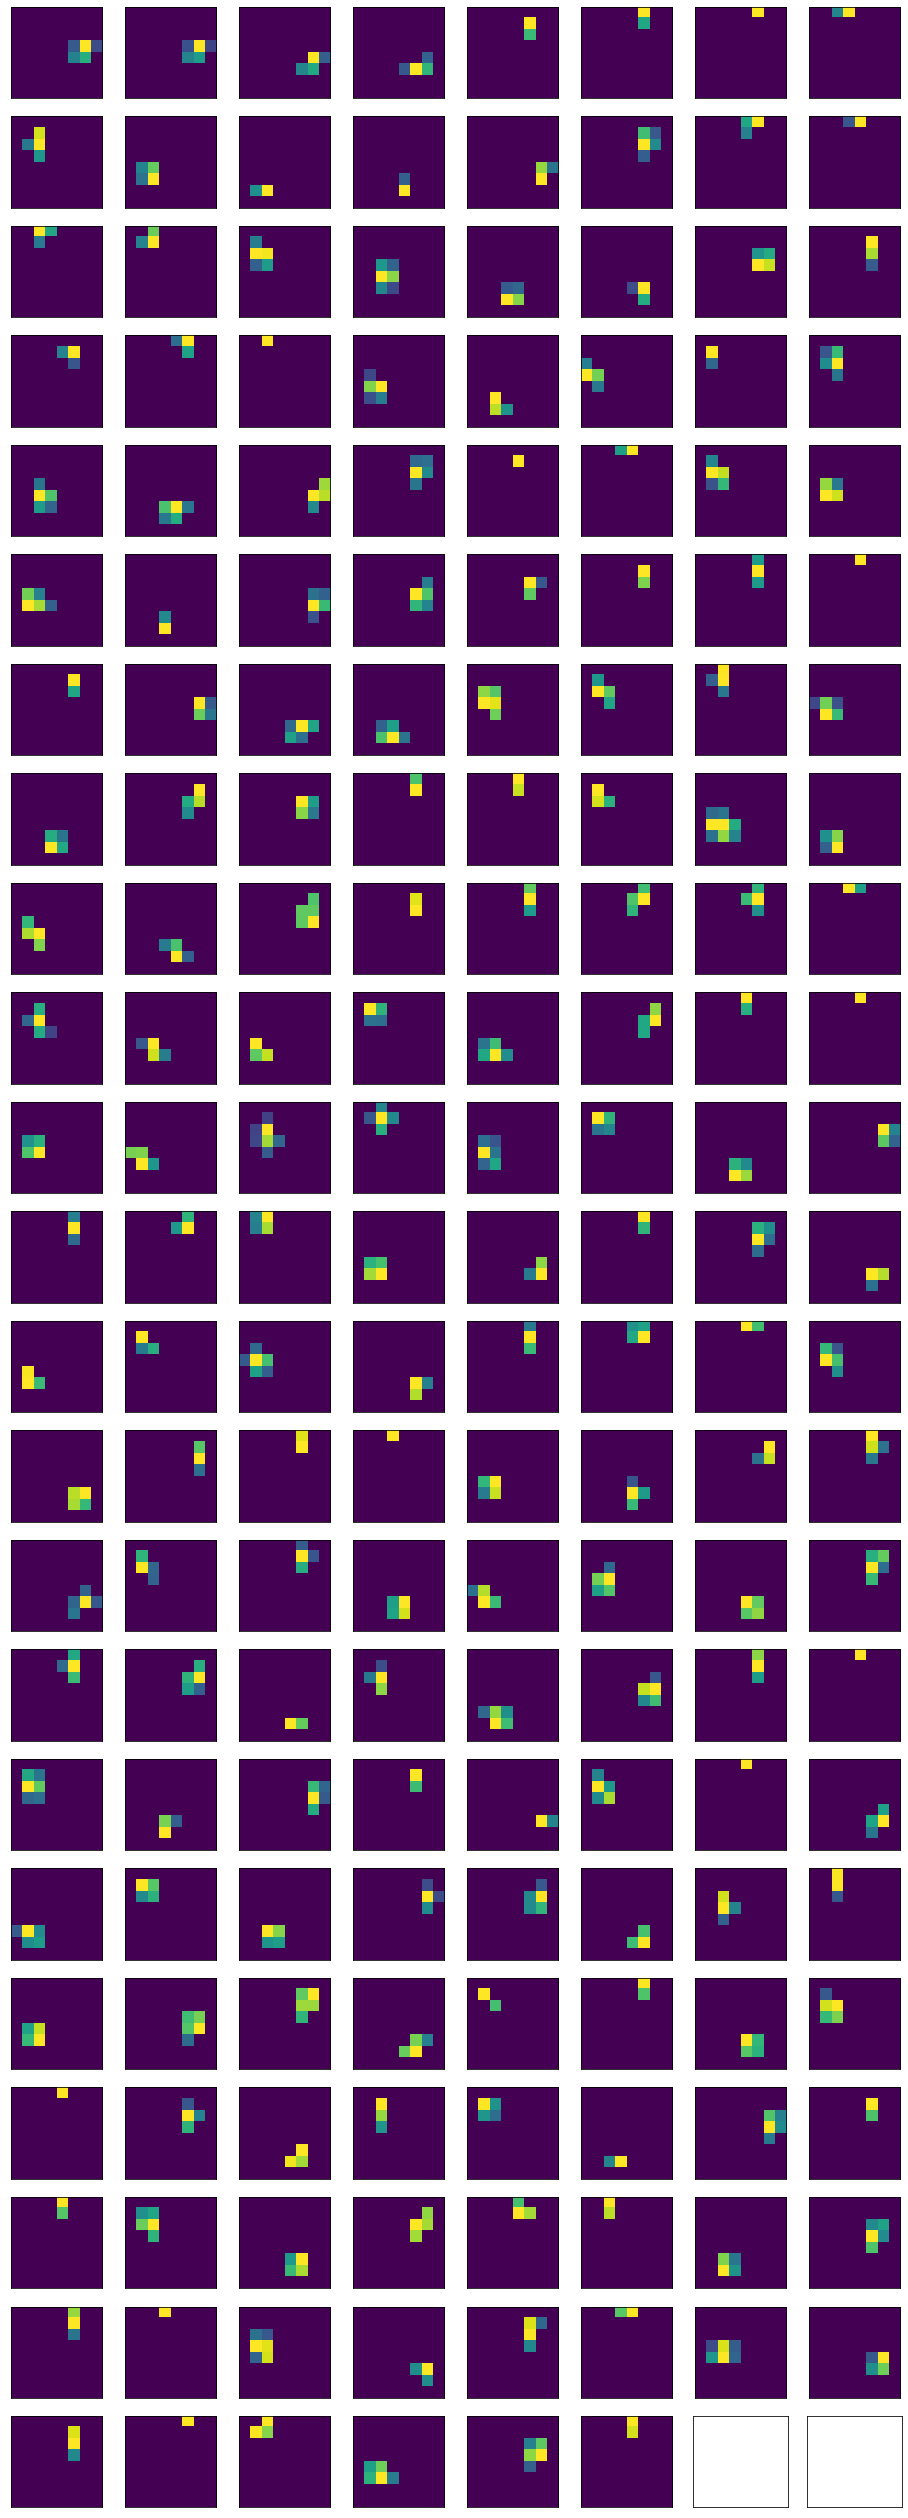

In [168]:
rm_bg(0.75, "off", "up", 1, True, "stand-shirt")

RAW: 2022-07-15_20-22-50__AC-off__BLINDS-up__NOP-2__stand-shirt__laying-jacket__BED
BG:  2022-07-05_17-59-26__AC-off__BLINDS-up__NOP-0


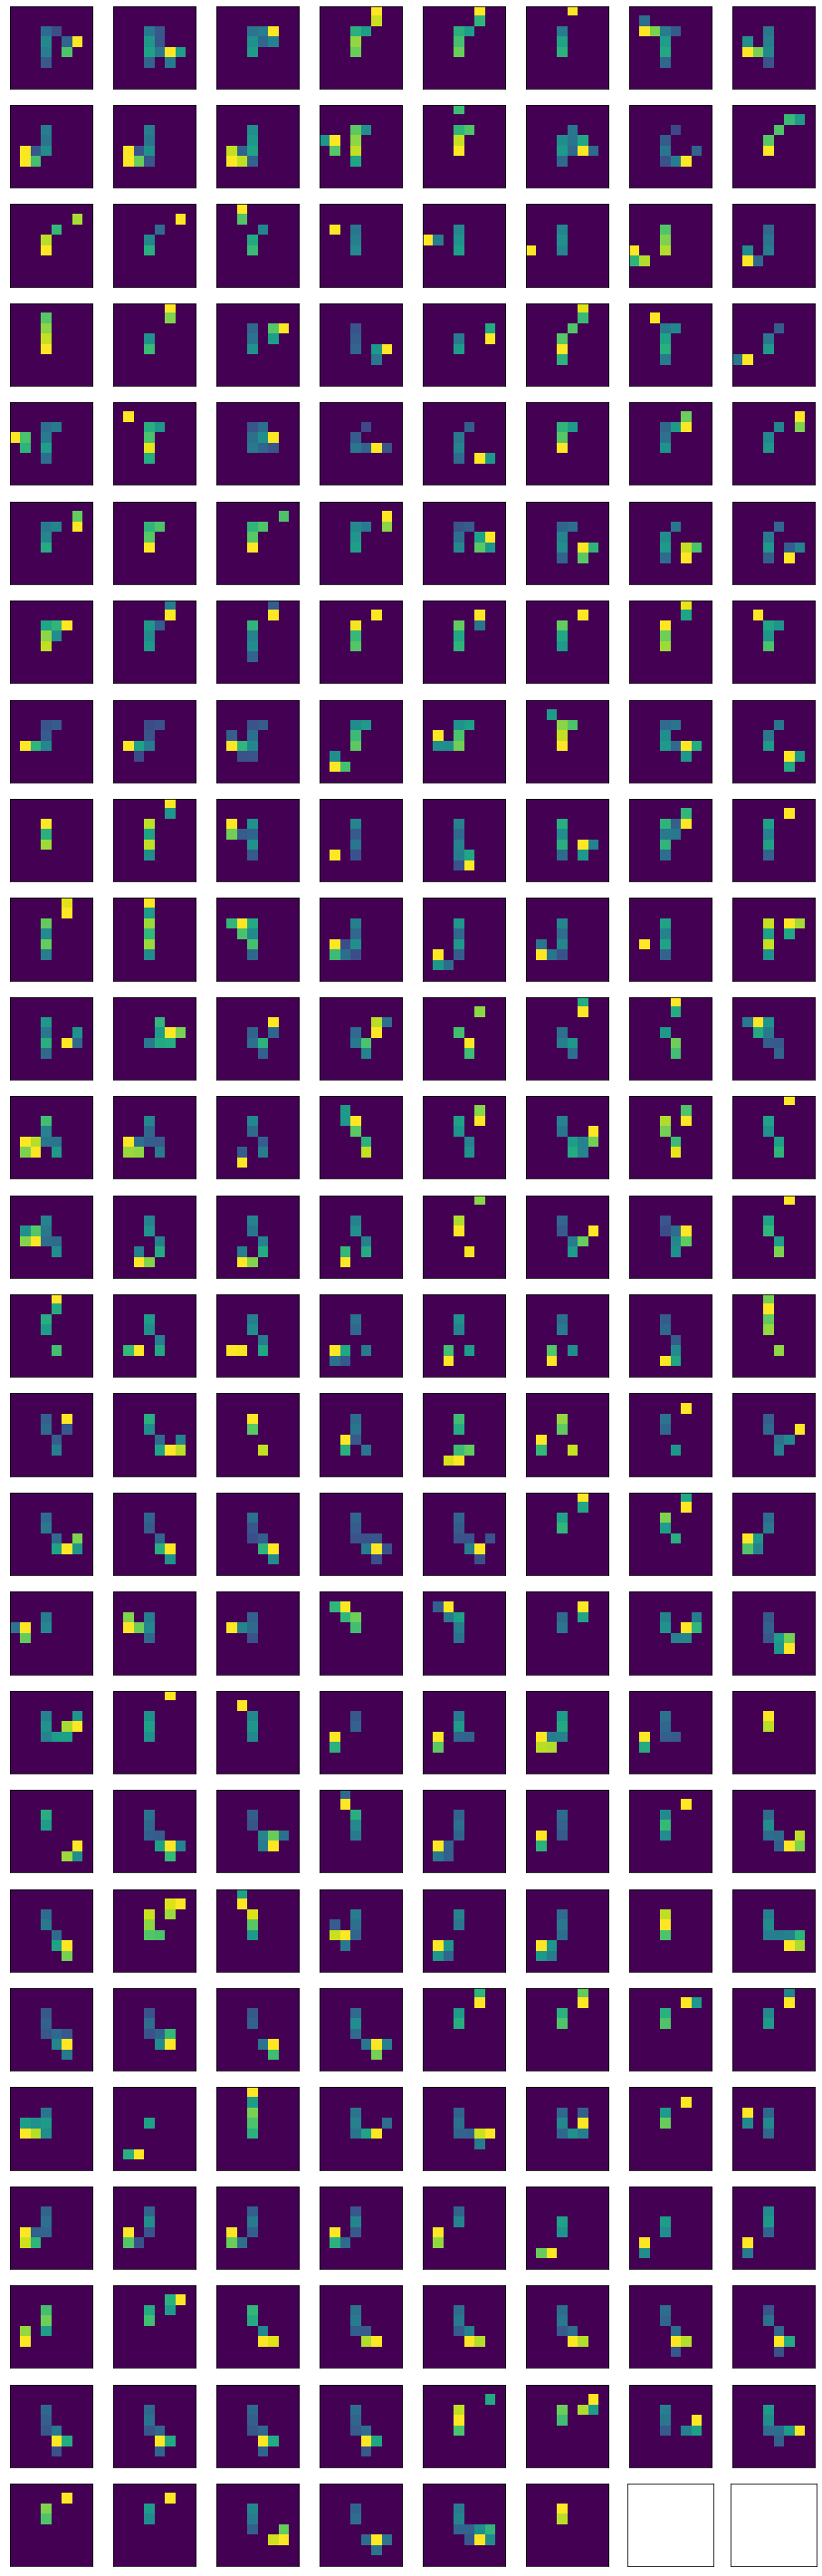

In [169]:
rm_bg(0.75, "off", "up", 2, True, "stand-shirt", "laying-jacket")

RAW: 2022-07-14_20-47-36__AC-on__BLINDS-up__NOP-2__stand-shirt__laying-jacket__BED
BG:  2022-07-13_17-42-55__AC-on__BLINDS-up__NOP-0


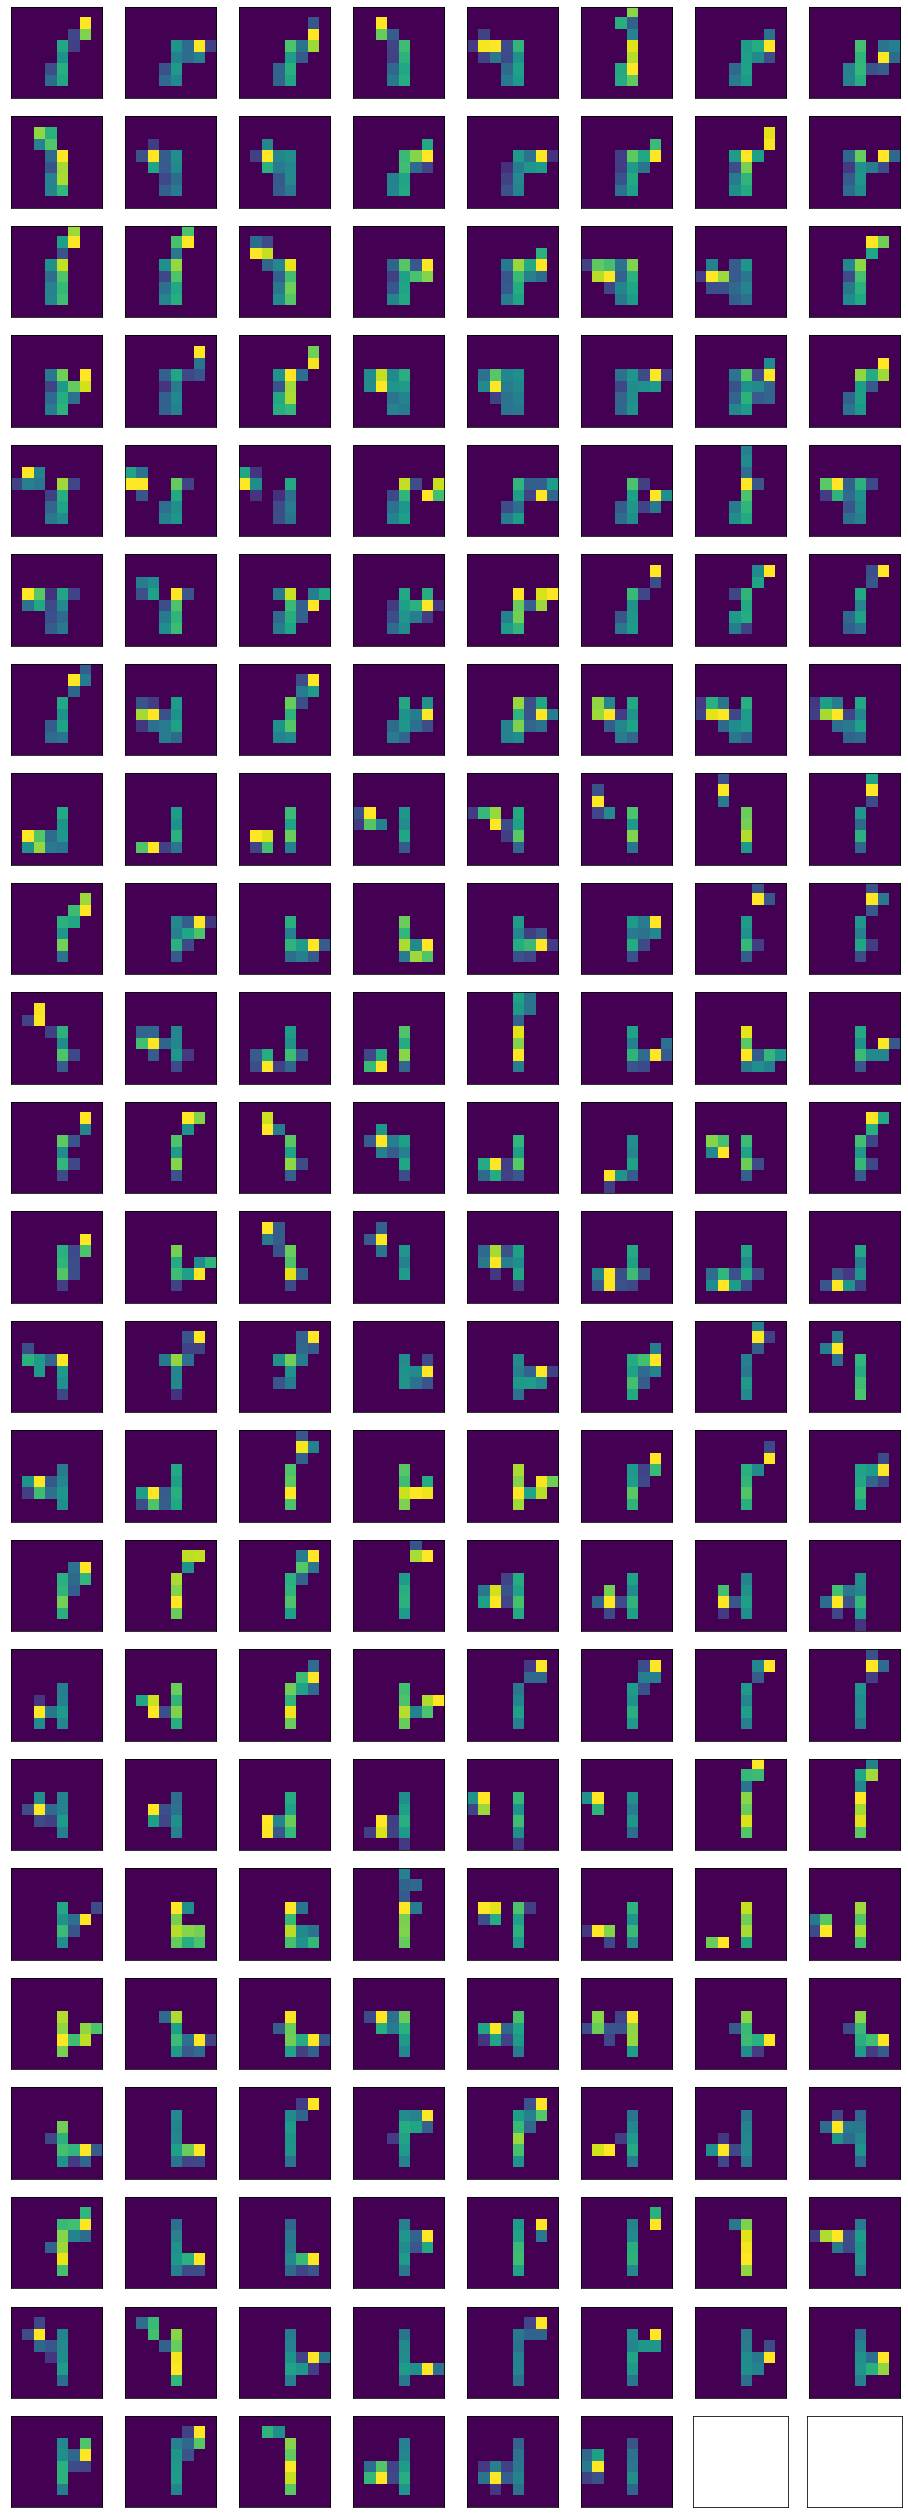

In [170]:
rm_bg(0.75, "on", "up", 2, True, "stand-shirt", "laying-jacket")

RAW: 2022-07-22_13-00-25__AC-off__BLINDS-up__NOP-1__stand-jacket
BG:  2022-07-05_17-59-26__AC-off__BLINDS-up__NOP-0


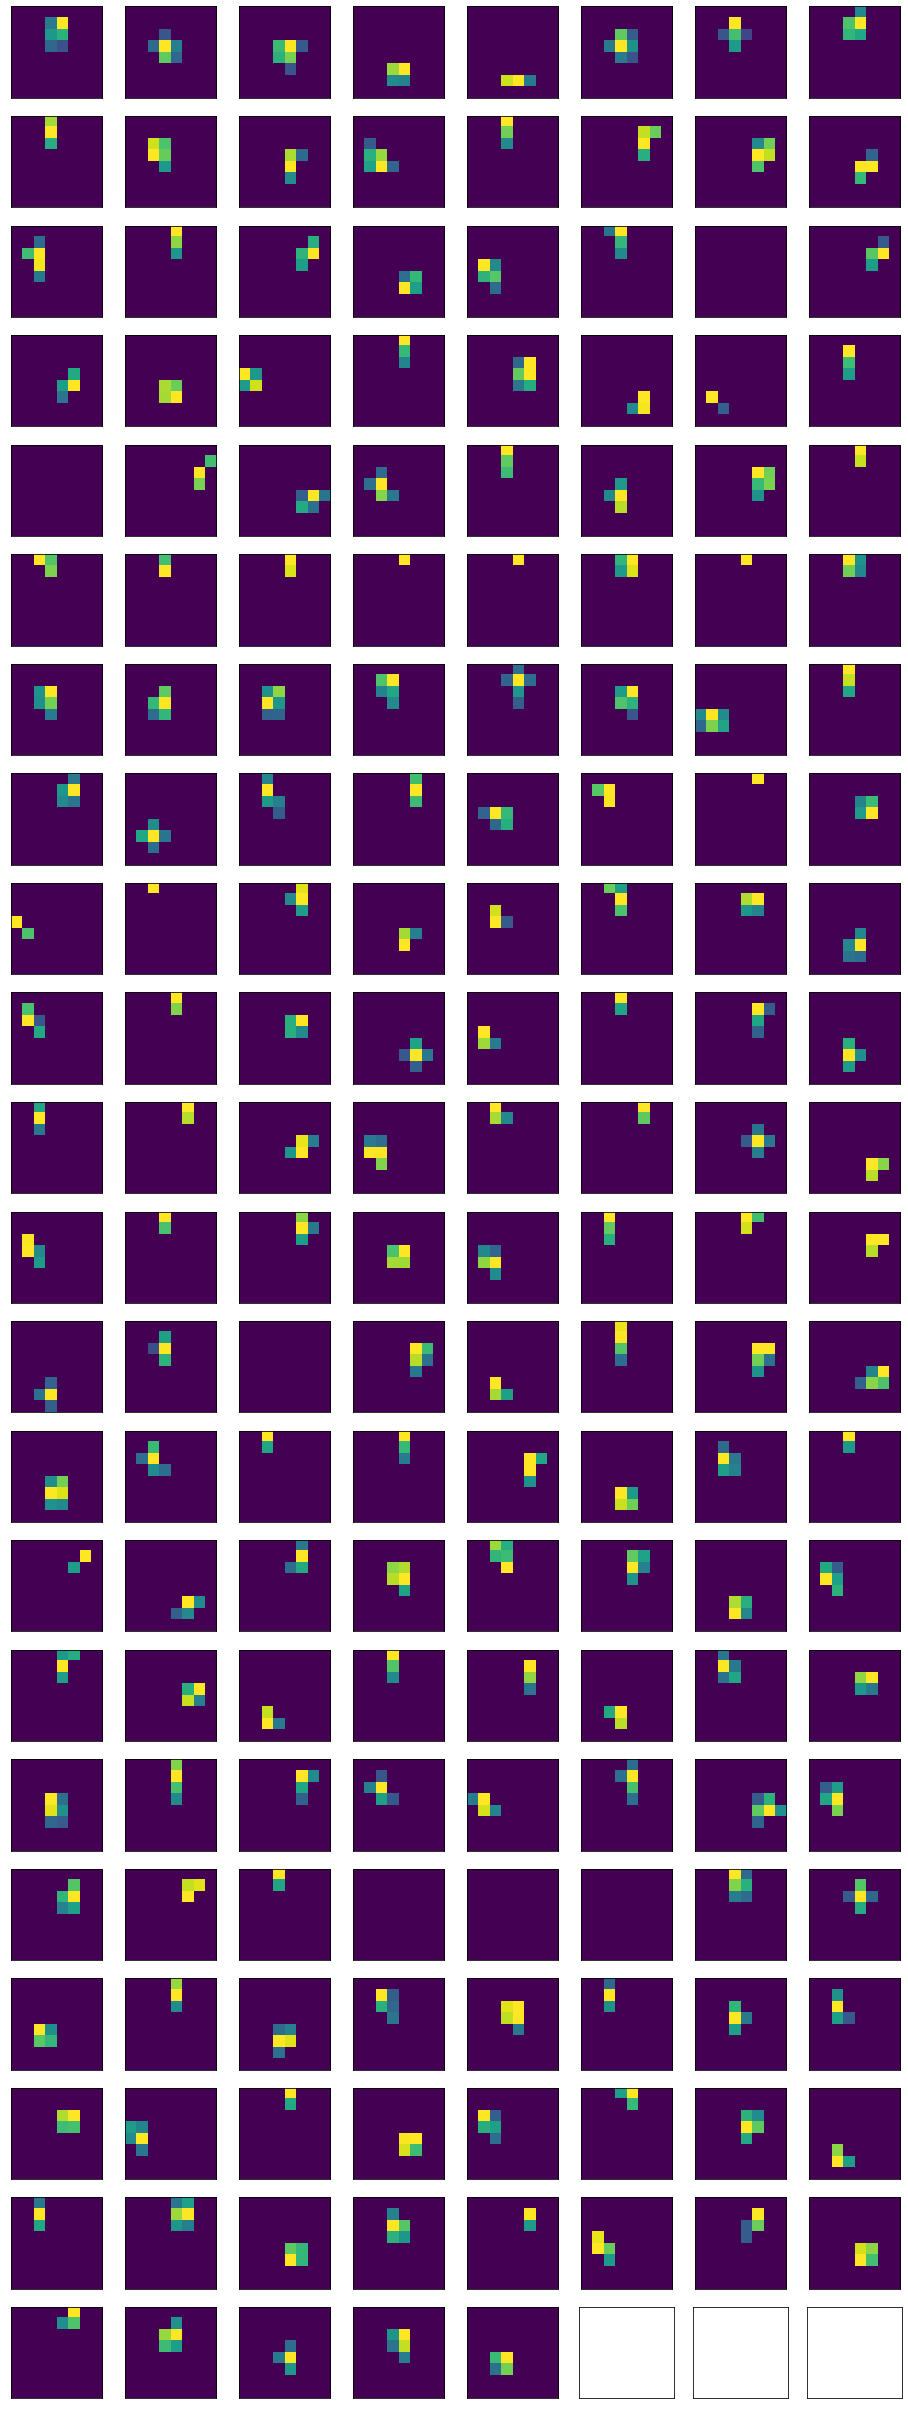

In [9]:
rm_bg(0.75, "off", "up", 1, False, "stand-jacket")

RAW: 2022-07-27_16-31-17__AC-off__BLINDS-down__NOP-1__stand-jacket
BG:  2022-07-06_13-04-50__AC-off__BLINDS-down__NOP-0


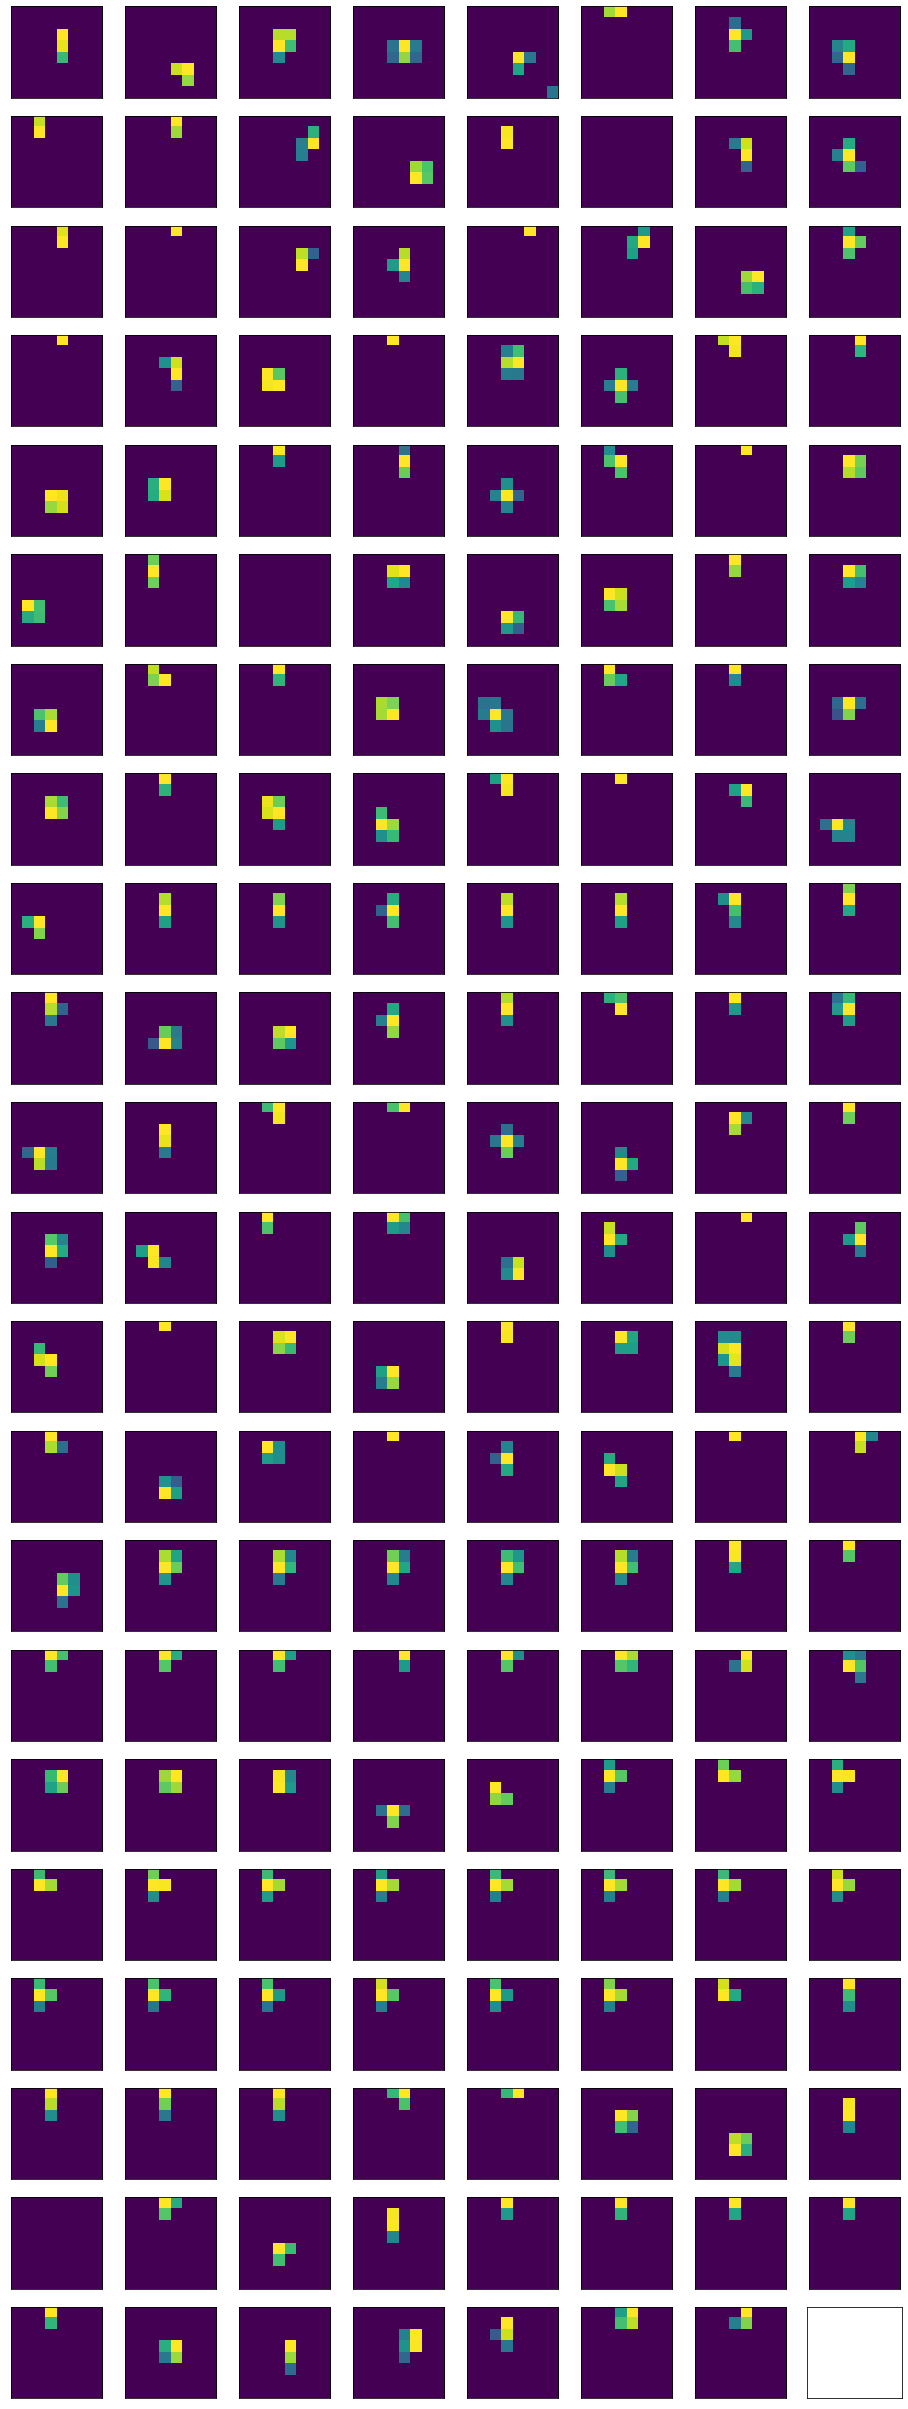

In [10]:
rm_bg(0.75, "off", "down", 1, False, "stand-jacket")